# Perform a Chi-squared test of independence

## Libraries and settings

In [42]:
# Libraries
import os
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# Plot style settings
plt.style.use('dark_background')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Get current working directory
print(os.getcwd())

/workspaces/data_analytics/GK/Week_07


## Contingency table

In [43]:
# Contingency table table showing the number of men and women buying different types of pets.     
#         dog  cat  bird
#    men	 207  282  241
#  women	 234  242  232

tab = np.array([[207,282,241], 
                [234,242,232]])
tab

array([[207, 282, 241],
       [234, 242, 232]])

## Perform a Chi-square test on the contingency table

In [44]:
# Null- and alternative hypothesis
# H0 = There is no association [relationship] between the gender and type of pet 
# H1 = There is an association [relationship] between the gender and type of pet 

# alpha
alpha = 0.05

# 1-alpha
prob = 0.95

# Chi-squared test
stat, p, dof, expected = chi2_contingency(tab)

# Critical value
critical = chi2.ppf(prob, dof)

# Print results of the Chi-square test
print('Expected frequencies:', '\n', expected.round(4), '\n')
print('Critical value:', critical.round(4), '\n')
print('Test statistic:', stat.round(4), '\n')
print('Degrees of freedom:', dof, '\n')
print(f'p-value: {p:.4f}')

Expected frequencies: 
 [[223.8734 266.0083 240.1182]
 [217.1266 257.9917 232.8818]] 

Critical value: 5.9915 

Test statistic: 4.5422 

Degrees of freedom: 2 

p-value: 0.1032


# Interpretation of test result

In [45]:
# Because the p-value of the Chi-squared test is larger than our significance-level alpha, 
# we cannot reject the null-hypothesis, i.e. we cannot find a statistically significant 
# (at the 0.05 significance-level) relationship between gender and the type of pet.

## Perform a correlation analysis

## Simulate numerical data 

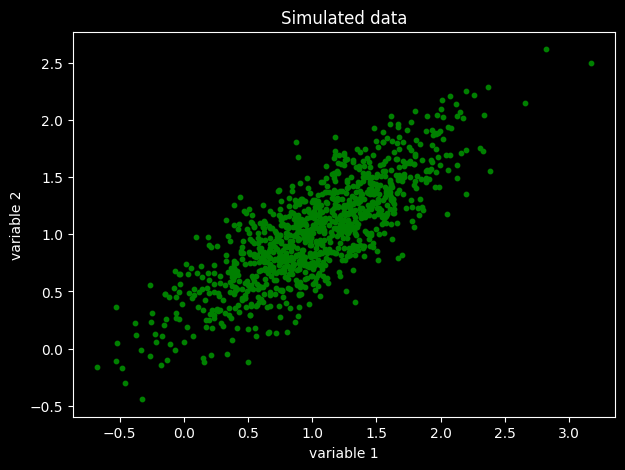

In [46]:
# Linear algebra function
linalg = np.linalg

# Sample size
np.random.seed(1)
num_samples = 1000
num_variables = 2

# Covariance matrix
cov = [[0.3, 0.2], [0.2, 0.2]]
# cov = [[1.0, 0.9], [0.9, 1.0]] # stronger correlation

# Simulation of data
L = linalg.cholesky(cov)
uncorrelated = np.random.standard_normal((num_variables, num_samples))
mean = [1, 1]
correlated = np.dot(L, uncorrelated) + np.array(mean).reshape(2, 1)
var1 = list(correlated[0, :])
var2 = list(correlated[1, :])

# Figure
plt.figure(figsize=(7,5))
plt.scatter(var1, var2, c='green', s=10)
plt.xlabel('variable 1')
plt.ylabel('variable 2')
plt.title('Simulated data')
plt.show()

## Calculate Pearson correlation coefficient (r)

In [47]:
# Persons correlation coefficient
# r = cov(X,Y) / sqrt(var(X)*var(Y))

# Perform Pearson's correlation
res = scipy.stats.pearsonr(var1, var2)

# Persons correlation coefficient
print(f'Persons correlation coefficient (r): {res[0]:.4f}')

Persons correlation coefficient (r): 0.8075


## Calculate Pearson correlation coefficient (r) with p-value

In [48]:
# Perform Pearson's correlation
res = scipy.stats.pearsonr(var1, var2)

# Persons correlation coefficient
print(f'Persons correlation coefficient (r): {res[0]:.4f}')

# p-value
print(f'p-value: {res[1]:.4f}')

Persons correlation coefficient (r): 0.8075
p-value: 0.0000


# Interpretation of correlation analysis results

In [49]:
# Because the p-value of the Pearson correlation analysis is smaller than our significance-level alpha, 
# we reject the null-hypothesis, i.e. there is statistically significant (at the 0.05 significance-level) 
# relationship between the two variables.

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [50]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.2.0-1015-azure
Datetime: 2023-10-30 10:28:56
Python Version: 3.10.13
-----------------------------------
